# Tarea 2


MA5203 - Aprendizaje de Máquinas Probabilístico

Profesor: Felipe Tobar

Autor: Martín Cornejo

## Paquetes necesarios

In [1]:
import numpy as np
import scipy.optimize as opt
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import pdb

# P1 Regresión No Lineal

In [2]:
data = np.genfromtxt('datosT2.txt', delimiter=' ')
x = data[:,0]
y = data[:,1]

# dividimos train y test en 75 y 25% respectivamente
x_tr = x[0:108];
y_tr = y[0:108];

x_te = x[108:144];
y_te = y[108:144];

### i) 
A continuación se grafica la data:

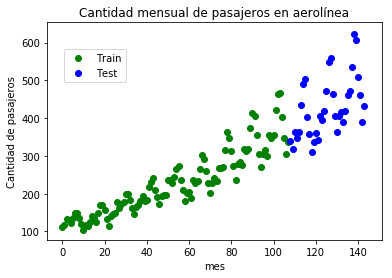

In [3]:
#mpl.rcParams['figure.figsize'] = (3,3)
plt.figure()
plt.scatter(x_tr,y_tr, c ='g')
plt.scatter(x_te,y_te, c ='b')
plt.title("Cantidad mensual de pasajeros en aerolínea")
plt.xlabel("mes")
plt.ylabel("Cantidad de pasajeros")
plt.legend(["Train","Test"], bbox_to_anchor=(0.25, 0.9))

### ii) 

Theta polyfit:  [1.18042041e-02 1.22971932e+00 1.19848879e+02]
Theta formula:  [1.18042041e-02 1.22971932e+00 1.19848879e+02]
Theta polyfit:  [1.18042041e-02 1.22971932e+00 1.19848879e+02]
Theta formula:  [1.18042041e-02 1.22971932e+00 1.19848879e+02]


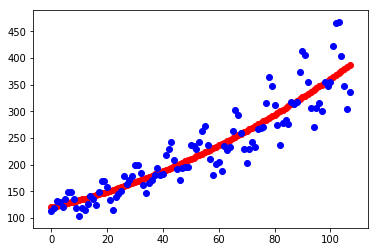

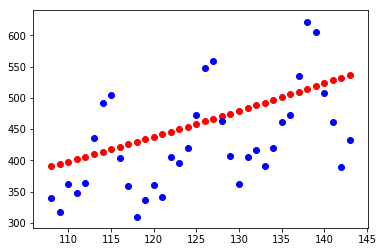

In [4]:
grado = 2
identity_size = grado + 1
x_tilda = np.array([x_tr, np.ones(len(x_tr))]).transpose()

for grado in range(2, grado + 1):
    x_tilda = np.append(np.array(np.power(x_tr,grado))[np.newaxis].transpose(), x_tilda, axis=1)

y_reg = y_tr

identidad = np.identity(identity_size)

def get_theta(rho):
    mul1 = np.linalg.inv(
        np.add(
            np.matmul(x_tilda.transpose(), x_tilda), 
            np.dot(identidad, rho)))
    mul2 = np.matmul(x_tilda.transpose(), y_reg)
    return np.matmul(mul1, mul2)

def poly(x, rho): 
    theta = get_theta(rho)
    print("Theta polyfit: ", np.polyfit(x_tr,y_reg, grado))
    print("Theta formula: ", get_theta(0))
    
    p = np.poly1d(theta)
    return p(x)

#salida = recta(x_te, 0)
#pdb.set_trace()

rho = 0

plt.figure()
plt.scatter(x_tr,poly(x_tr, rho), c ='r')
plt.scatter(x_tr,y_tr, c ='b')

plt.figure()
plt.scatter(x_te,poly(x_te, rho), c ='r')
plt.scatter(x_te,y_te, c ='b')

### iii)

In [27]:
coefs_pol = [0.012, 1.22, 120]

def f_theta(x, theta):
    f_pol = np.poly1d(coefs_pol)
    
    return np.add(
        f_pol(x), 
        np.multiply(
            theta[0], 
            np.multiply(
                np.sin(
                    np.add(np.multiply(theta[1],x), 
                           theta[2])),
                np.exp(np.multiply(theta[3],x)))))

def cost_func(theta, x, y):
    f_theta2 = lambda t: f_theta(t, theta)
    
    return np.sum(np.power(np.subtract(y, np.vectorize(f_theta2)(x)), 2))

    
theta_1 = np.array([0.9, 0.5, 0.1, 0.01])
#f_theta(2, theta_1)
#cost_func(x_tr, y_tr, theta_1)

opt.minimize(cost_func, theta_1, args=(x_tr, y_tr), method='BFGS')

      fun: 36548.55439238251
 hess_inv: array([[ 2.73791990e-06,  1.47350104e-08, -1.38054334e-06,
        -3.75062619e-09],
       [ 1.47350104e-08,  9.22991089e-10, -7.51346708e-09,
         3.38652439e-12],
       [-1.38054334e-06, -7.51346708e-09,  7.02994999e-07,
         1.43800767e-09],
       [-3.75062619e-09,  3.38652439e-12,  1.43800767e-09,
         9.03814164e-10]])
      jac: array([ 0.00048828, -0.0078125 ,  0.00048828,  0.00537109])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 611
      nit: 28
     njev: 100
   status: 2
  success: False
        x: array([11.92024372,  0.52158016, -1.24788885,  0.01741584])

Graficamos el resultado de la optimización:

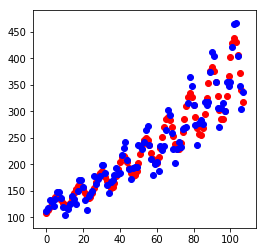

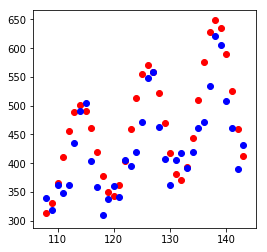

In [28]:
theta_2 = np.array([11.92024372,  0.52158016, -1.24788885,  0.01741584])

#pdb.set_trace()
plt.figure()
plt.scatter(x_tr,f_theta(x_tr, theta_2), c ='r')
plt.scatter(x_tr,y_tr, c ='b')

plt.figure()
plt.scatter(x_te,f_theta(x_te, theta_2), c ='r')
plt.scatter(x_te,y_te, c ='b')

### iv)

### Regresión lineal regularizada

Sabemos que para la regresión lineal regularizada, el parámetro $\theta$ tiene la forma:
\begin{equation}
\theta = (\tilde{X}^{T}\tilde{X} + \rho I)^{-1} \tilde{X}^{T}Y
\end{equation}

Dado que este es el caso en que $x \rightarrow f(x) \ \epsilon \ \rm I\!R \rightarrow \rm I\!R$, tenemos que $\tilde{X}$ tiene la forma

\begin{equation}
\tilde{X} = \begin{bmatrix}
           x_{1} & 1\\
           x_{2} & 1\\
           \vdots & \vdots \\
           x_{N} & 1
         \end{bmatrix}
, \ Y = \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           \vdots \\
           y_{N} 
         \end{bmatrix}
\end{equation}

Por lo que la identidad pertenecerá a $\rm I\!R^{2x2}$ y $\theta$ a $\rm I\!R^{2}$, lo cual tiene sentido ya que $\theta$ tiene la forma de un vector de dos componentes, cuyos valores corresponderán a la pendiente $m$ y el coeficiente de posición $b$ de una recta. 

In [7]:
x_tilda = np.array([x, np.ones(len(x))]).transpose()
y_reg = y
rho = 0
identidad = np.identity(2)

def get_theta(rho):
    mul1 = np.linalg.inv(
        np.add(
            np.matmul(x_tilda.transpose(), x_tilda), 
            np.dot(identidad, rho)))
    mul2 = np.matmul(x_tilda.transpose(), y_reg)
    return np.matmul(mul1, mul2)

Luego de obtener $\theta$ en función de $\rho$, procedemos a graficar predicciones para 10 puntos con distintos valores de $\rho$:

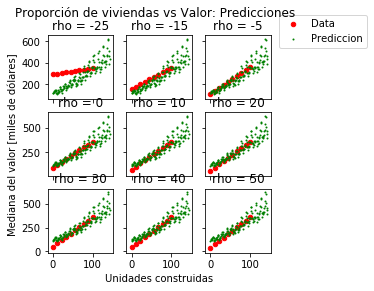

In [8]:
def recta(x, rho): 
    theta = get_theta(rho)
    return x * theta[0] + theta[1]

mpl.rcParams['figure.figsize'] = (4,4)
x_recta = np.linspace(0, 100, 10)
scatter_size = 20
f, figures = plt.subplots(3, 3, sharex='col', sharey='row')
plt.suptitle("Proporción de viviendas vs Valor: Predicciones")
rho = np.array([[-25, -15, -5], [0, 10, 20], [30, 40, 50]])
for idx, figure_arr in enumerate(figures):
    for idy, figure in enumerate(figure_arr):
        figure.set_title("rho = " + str(rho[idx][idy]))
        figure.scatter(
            x_recta,
            recta(x_recta, rho[idx][idy]), 
            s=scatter_size, c='r')
        figure.scatter(x,y, s=1, c='g')   
            
        if idy == 1 and idx == 2:
            figure.set_xlabel("Unidades construidas")
        
        if idy == 0 and idx == 1:
            figure.set_ylabel("Mediana del valor [miles de dólares]")
            
        if idy == len(rho[0]) - 1 and idx == 0:
            figure.legend(["Data","Prediccion"], bbox_to_anchor=(1.05, 1.40))

### Comparando con polyfit

Es claro observar que el resultado de __polyfit__ es equivalente a usar nuestro resultado usando $\rho = 0$, es más notamos que los parámetros de ambas rectas son casi idénticos:

In [9]:
print("Theta polyfit: ", np.polyfit(x,y, 1))
print("Theta formula: ", get_theta(0))

Theta polyfit:  [ 2.65718391 90.30996169]
Theta formula:  [ 2.65718391 90.30996169]
